<a href="https://colab.research.google.com/github/Karame12/Projects/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K_Means Clustering:

In [ ]:
# Import data:
import pandas as pd

highway = pd.read_csv('highway.csv')
highway.head()

,Rate,Len,Adt,Trks,Slim,Lwid,Shld,Itg,Sigs,Acpt,Lane,Fai,Pa,Ma
0,4.58,4.99,69,8,55,12,10,1.20,0.0,4.6,8,1,0,0
1,2.86,16.11,73,8,60,12,10,1.43,0.0,4.4,4,1,0,0
2,3.02,9.75,49,10,60,12,10,1.54,0.0,4.7,4,1,0,0
3,2.29,10.65,61,13,65,12,10,0.94,0.0,3.8,6,1,0,0
4,1.61,20.01,28,12,70,12,10,0.65,0.0,2.2,4,1,0,0


In [ ]:
# Average of Access Points:

print("Average of Access Points is: ", round(highway['Acpt'].mean(),3))

Average of Access Points is:  12.159


In [ ]:
# Average of Truck Volume:

print("Average of truck volume is: ", round(highway['Trks'].mean(),3))

Average of truck volume is:  9.333


Value of K for the K-means clustering algorithm will lead to a solution that definitely includes the centroid (x1, x2) is (12.159, 9.333)


Text(0.5, 1.0, 'Truck Volume vs. Access Point')

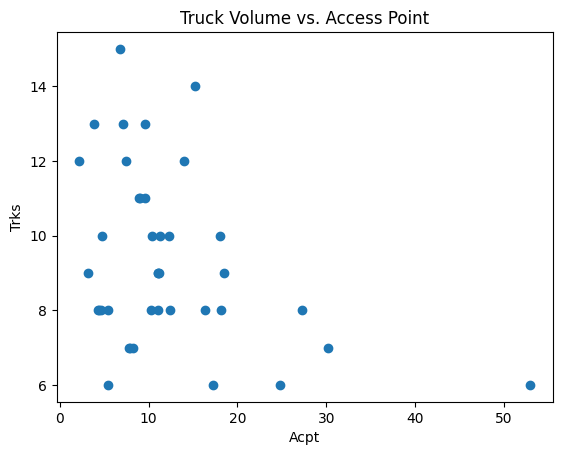

In [ ]:
# Scatter Plot:
import matplotlib.pyplot as plt
plt.scatter(highway['Acpt'], highway['Trks'])
plt.xlabel('Acpt')
plt.ylabel('Trks')
plt.title('Truck Volume vs. Access Point')

In [ ]:
# K-mean cluster where K=2:

from sklearn.cluster import KMeans
HWData = highway[['Acpt', 'Trks']]
est = KMeans(random_state=0, n_clusters = 2)
clusters = est.fit(HWData)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Labeling the clusters:
clusters.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# Number of Observations in each cluster:
cluster0count = sum(1*(clusters.labels_ == 0))
cluster1count = sum(1*(clusters.labels_ == 1))
print("Number of observations in cluster 0: ", cluster0count)
print("Number of observations in cluster 1: ", cluster1count)

Number of observations in cluster 0:  35
Number of observations in cluster 1:  4


In [ ]:
# Centroids of the Clusters:
clusters.cluster_centers_

array([[ 9.68285714,  9.62857143],
       [33.825     ,  6.75      ]])

Text(0.5, 1.0, 'Truck Volume vs. Access Point')

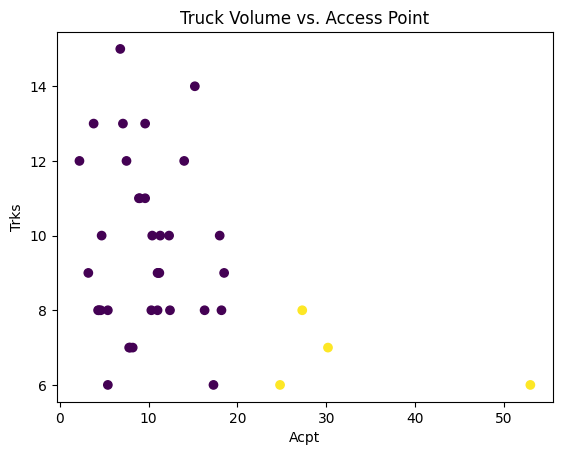

In [ ]:
# Visualizing the Clusters:
plt.scatter(highway['Acpt'], highway['Trks'], c = clusters.labels_)
plt.xlabel('Acpt')
plt.ylabel('Trks')
plt.title('Truck Volume vs. Access Point')

In [ ]:
# Calculatin the Intertia of the Clusters:
print("Interia =",clusters.inertia_)

Interia = 1388.258642857143


In [ ]:
# K-mean cluster where K=3:

from sklearn.cluster import KMeans
est = KMeans(random_state = 0, n_clusters = 3)
clusters = est.fit(HWData)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Labeling for K =3

K_3 = clusters.labels_

Text(0.5, 1.0, 'Truck Volume vs. Access Point')

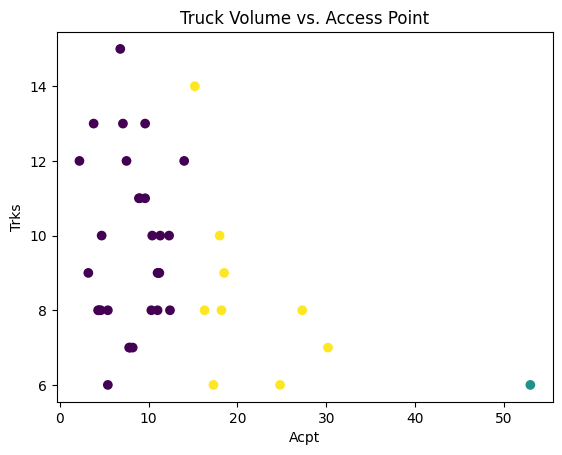

In [ ]:
plt.scatter(highway['Acpt'], highway['Trks'], c = K_3)
plt.xlabel('Acpt')
plt.ylabel('Trks')
plt.title('Truck Volume vs. Access Point')

In [ ]:
# Normalizing the data:

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

highway['Trks_normalized'] = min_max_scaling(highway['Trks'])
highway['Acpt_normalized'] = min_max_scaling(highway['Acpt'])

In [ ]:
# Clustering using Normalized Data:

from sklearn.cluster import KMeans
HWData_Normalized = highway[['Acpt_normalized', 'Trks_normalized']]
est = KMeans(random_state = 0, n_clusters = 2)
clusters = est.fit(HWData_Normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Centroids of the Normalized Clusters:

clusters.cluster_centers_

array([[0.23382403, 0.1884058 ],
       [0.14173228, 0.63194444]])

Text(0.5, 1.0, 'Truck Volume vs. Access Point')

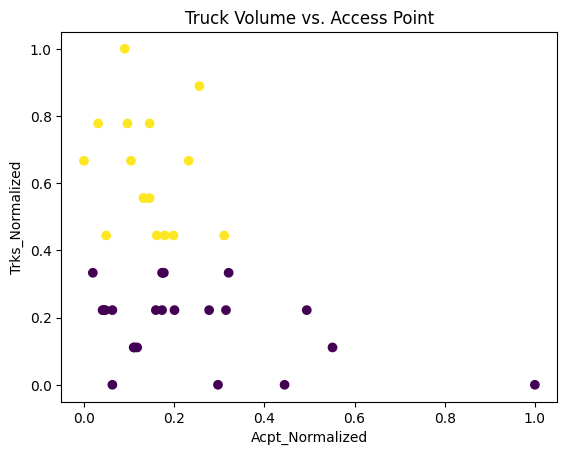

In [ ]:
# K-mean Cluster with K=2:

plt.scatter(highway['Acpt_normalized'], highway['Trks_normalized'], c = clusters.labels_)
plt.xlabel('Acpt_Normalized')
plt.ylabel('Trks_Normalized')
plt.title('Truck Volume vs. Access Point')

In [ ]:
from sklearn.cluster import KMeans
HWData_Normalized = highway[['Acpt_normalized', 'Trks_normalized']]
est = KMeans(random_state = 0, n_clusters = 3)
clusters = est.fit(HWData_Normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Truck Volume vs. Access Point')

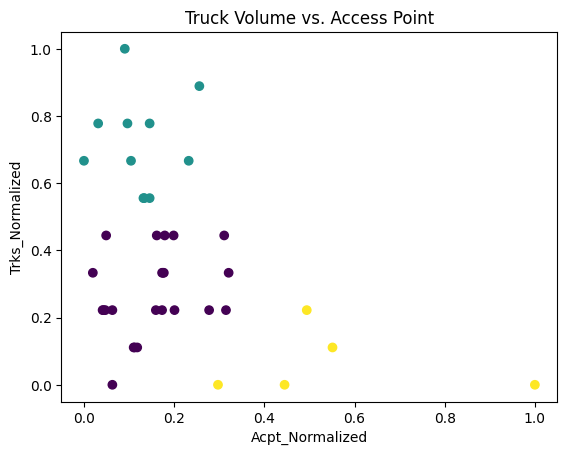

In [ ]:
# K-mean Cluster with K=3:

plt.scatter(highway['Acpt_normalized'], highway['Trks_normalized'], c = clusters.labels_)
plt.xlabel('Acpt_Normalized')
plt.ylabel('Trks_Normalized')
plt.title('Truck Volume vs. Access Point')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Within-Cluster Sum-of-Squares vs. K')

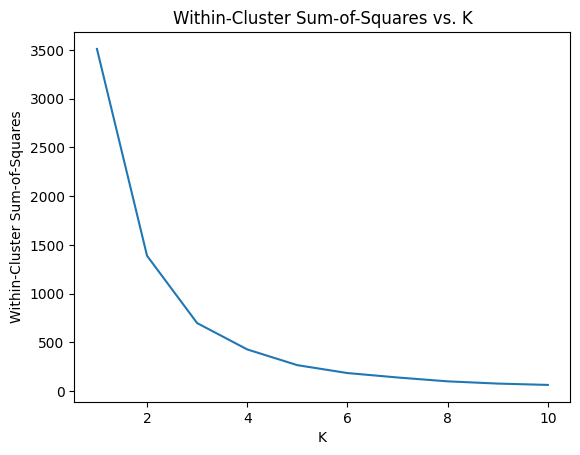

In [ ]:
# Elbow Method:

WCSS = []
K_Values = []

for K in range(1, 11):
  est = KMeans(random_state=0, n_clusters = K)
  clusters = est.fit(HWData)
  K_Values.append(K)
  WCSS.append(clusters.inertia_)

plt.plot(K_Values, WCSS)
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum-of-Squares')
plt.title('Within-Cluster Sum-of-Squares vs. K')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Within-Cluster Sum-of-Squares vs. K')

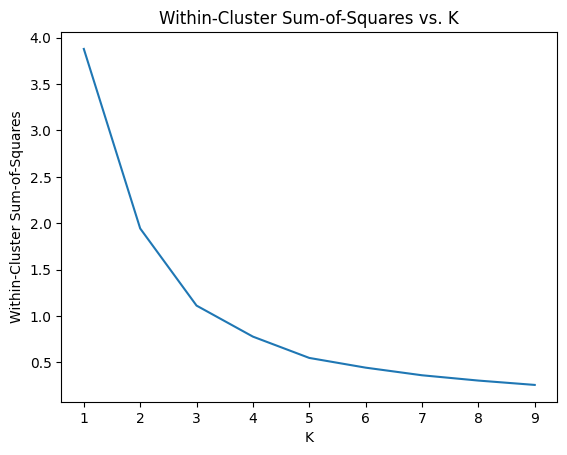

In [ ]:
# Elbow Method Normalized:

WCSS = []
K_Values = []

for K in range(1, 10):
  est = KMeans(random_state=0, n_clusters = K)
  clusters = est.fit(HWData_Normalized)
  K_Values.append(K)
  WCSS.append(clusters.inertia_)

plt.plot(K_Values, WCSS)
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum-of-Squares')
plt.title('Within-Cluster Sum-of-Squares vs. K')

In [ ]:
from sklearn.cluster import KMeans

est3 = KMeans(random_state=0, n_clusters = 3)
clusters3 = est3.fit(HWData_Normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Truck Volume vs. Access Point')

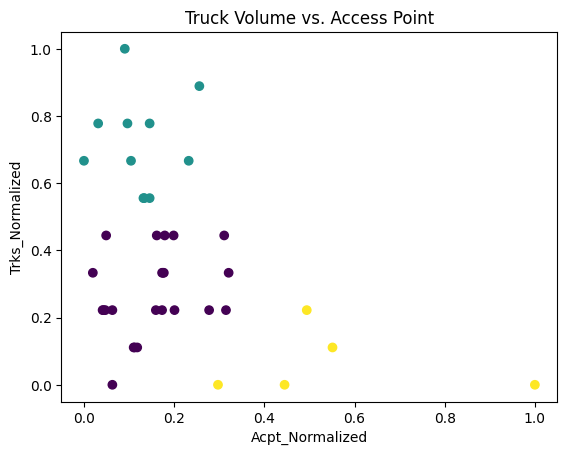

In [ ]:
plt.scatter(highway['Acpt_normalized'], highway['Trks_normalized'], c = clusters3.labels_)
plt.xlabel('Acpt_Normalized')
plt.ylabel('Trks_Normalized')
plt.title('Truck Volume vs. Access Point')

In [ ]:
highway['Label'] = clusters3.labels_

cluster0 = highway[(highway['Label'] == 0)]

In [ ]:
cluster0

,Rate,Len,Adt,Trks,Slim,Lwid,Shld,Itg,Sigs,Acpt,Lane,Fai,Pa,Ma,Trks_normalized,Acpt_normalized,Label
0,4.58,4.99,69,8,55,12,10,1.20,0.00,4.6,8,1,0,0,0.222222,0.047244,0
1,2.86,16.11,73,8,60,12,10,1.43,0.00,4.4,4,1,0,0,0.222222,0.043307,0
2,3.02,9.75,49,10,60,12,10,1.54,0.00,4.7,4,1,0,0,0.444444,0.049213,0
6,3.85,8.57,46,8,55,12,8,0.47,0.70,11.0,4,0,1,0,0.222222,0.173228,0
7,6.12,5.24,25,9,55,12,10,0.38,0.38,18.5,4,0,1,0,0.333333,0.320866,0
9,5.88,8.26,23,7,50,12,5,0.12,1.21,8.2,4,0,1,0,0.111111,0.118110,0
10,4.20,7.03,23,6,60,12,10,0.29,1.85,5.4,4,0,1,0,0.000000,0.062992,0
11,4.61,13.28,20,9,50,12,2,0.15,1.21,11.2,4,0,1,0,0.333333,0.177165,0
13,3.85,2.96,21,8,60,12,10,0.34,0.00,5.4,4,0,1,0,0.222222,0.062992,0
14,2.69,11.75,27,7,55,12,10,0.26,0.60,7.9,4,0,1,0,0.111111,0.112205,0


In [ ]:
# Average of Rate in Cluster 0:
cluster0['Rate'].mean()

3.5204347826086964

In [ ]:
cluster1 = highway[(highway['Label'] == 1)]
cluster2 = highway[(highway['Label'] == 2)]

In [ ]:
print("Mean of cluster 1 is:", cluster1['Rate'].mean())
print("Mean of cluster 2 is:", cluster2['Rate'].mean())

Mean of cluster 1 is: 2.9127272727272726
Mean of cluster 2 is: 8.078
